## Statistical data processing of the bicycle sharing system (using SciPy, Pandas, NumPy, Matplotlib, Seaborn)

The source file contains the following data:
*   `daytime` - A moment in time in hour detail
*   season - 1: spring, 2: summer, 3: autumn, 4: winter)
*   holiday - will this day be a holiday or not
*   workingday -  if the day is neither a day off nor a holiday, the value is 1. Otherwise it is 0
*   weather:
**  1: Clear, Slightly cloudy
**  2: Fog + Cloudy, Fog + Broken clouds, Fog + Some clouds, Fog
**  3: Light snow, Light rain + Thunderstorm + Scattered clouds, Light rain + Scattered clouds
**  4: Heavy rain + Ice pallets + Thunderstorm + Fog, Snow + Fog
*   temp - temperature in centigrades
*   atemp - perceived temperature in centigrades
*   humidity
*   windspeed
*   casual - number of random users
*   registered - number of registered users
*   count - the total number of rented bicycles, including random and registered ones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

Dataframe based on uploaded data, after deleting the first indicator:

In [2]:
df = pd.read_csv("bikeshare.csv")
del df['datetime']
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


The main statistical indicators for each of the metrics:

In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### 1. Histograms based on metrics containing continuous values

In [4]:
col_box = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

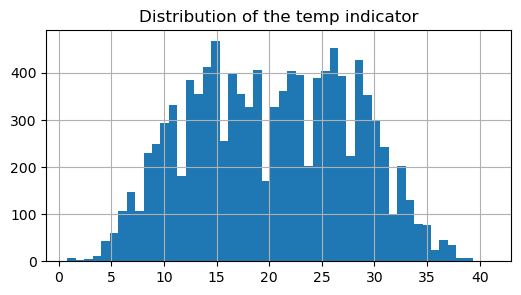

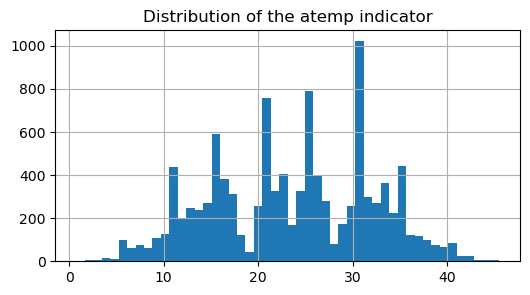

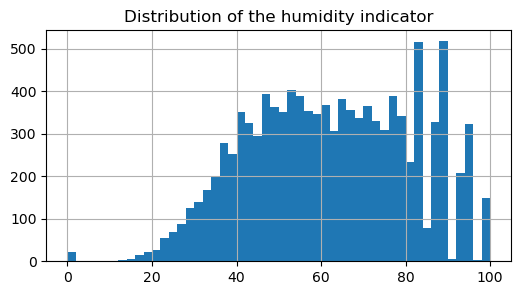

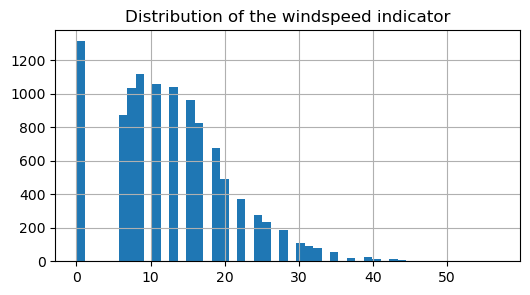

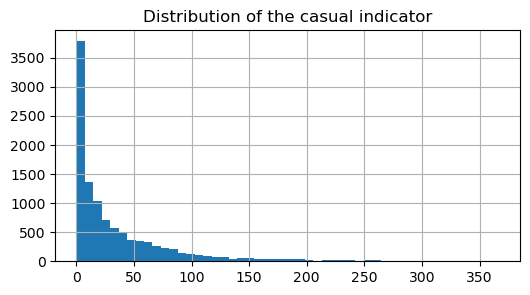

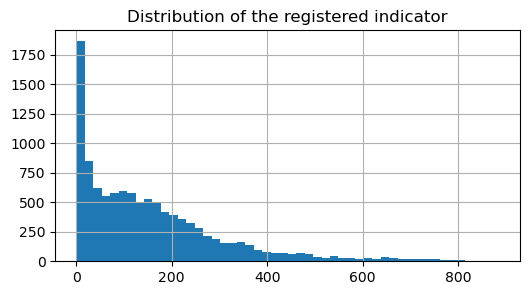

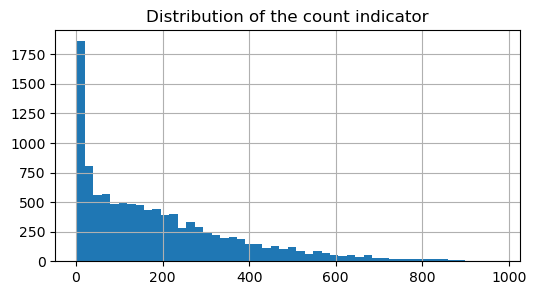

In [5]:
def my_plot(feature):
    fig, ax = plt.subplots(figsize=(6, 3))
    df[feature].hist(bins=50)
    plt.title('Distribution of the {} indicator'.format(feature))
for column in col_box:
    my_plot(column)

Text(0.5, 1.0, 'Distribution of the logarithm of the count indicator')

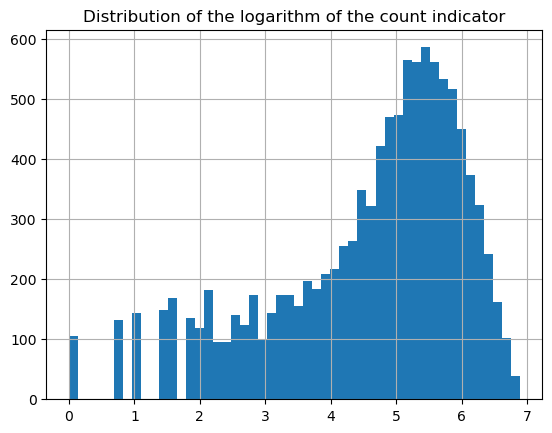

In [6]:
df['count'].apply(np.log).hist(bins=50)
plt.title('Distribution of the logarithm of the count indicator')

### 2. Mean, variance, 50, 75 and 99 percentiles, mode of selected indicators

In [7]:
for column in col_box:
    print('Basic metrics of the {} indicator:'.format(column))
    print('Mean: {}'.format(df[column].mean()))
    print('Standard deviation: {}'.format(df[column].std()))
    print('Percentile 50 (median): {}'.format(np.percentile(df[column], 50)))
    print('Percentile 75: {}'.format(np.percentile(df[column], 75)))
    print('Percentile 99: {}'.format(np.percentile(df[column], 99)))
    print('Mode: {}'.format(df[column].value_counts().nlargest(1)))
    print('-' * 40)

Basic metrics of the temp indicator:
Mean: 20.23085981995223
Standard deviation: 7.791589843987506
Percentile 50 (median): 20.5
Percentile 75: 26.24
Percentile 99: 36.08
Mode: temp
14.76    467
Name: count, dtype: int64
----------------------------------------
Basic metrics of the atemp indicator:
Mean: 23.655084052912
Standard deviation: 8.474600626484888
Percentile 50 (median): 24.24
Percentile 75: 31.06
Percentile 99: 40.15
Mode: atemp
31.06    671
Name: count, dtype: int64
----------------------------------------
Basic metrics of the humidity indicator:
Mean: 61.88645967297446
Standard deviation: 19.245033277394786
Percentile 50 (median): 62.0
Percentile 75: 77.0
Percentile 99: 100.0
Mode: humidity
88    368
Name: count, dtype: int64
----------------------------------------
Basic metrics of the windspeed indicator:
Mean: 12.7993954069447
Standard deviation: 8.16453732683849
Percentile 50 (median): 12.998
Percentile 75: 16.9979
Percentile 99: 35.0008
Mode: windspeed
0.0    1313
Name

The largest percentage of abnormal values is available for `casual` and `registered` indicators.

### 3. An analysis of the asymmetry and the distribution bias offor selected metrics

In [8]:
for column in col_box:
    print('Additional metrics for the {} indicator:'.format(column))
    print('Asymetry: {}'.format(df[column].skew()))
    print('kurtosis: {}'.format(df[column].kurtosis()))
    print('-' * 40)

Additional metrics for the temp indicator:
Asymetry: 0.003690844422472008
kurtosis: -0.9145302637630794
----------------------------------------
Additional metrics for the atemp indicator:
Asymetry: -0.10255951346908665
kurtosis: -0.8500756471754651
----------------------------------------
Additional metrics for the humidity indicator:
Asymetry: -0.08633518364548581
kurtosis: -0.7598175375208864
----------------------------------------
Additional metrics for the windspeed indicator:
Asymetry: 0.5887665265853944
kurtosis: 0.6301328693364932
----------------------------------------
Additional metrics for the casual indicator:
Asymetry: 2.4957483979812567
kurtosis: 7.551629305632764
----------------------------------------
Additional metrics for the registered indicator:
Asymetry: 1.5248045868182296
kurtosis: 2.6260809999210672
----------------------------------------
Additional metrics for the count indicator:
Asymetry: 1.2420662117180776
kurtosis: 1.3000929518398334
--------------------

None of the metrics fully meets the requirements of the normal law.

Symmetrical, but blurred: `temp`, `atemp`, `humidity`.

Asymmetric, but with a high density concentration (in ascending order of both indicators): `windspeed`, `count`, `registered`, `casual`. The last 3 mentioned metrics are characterized by a very high prevalence of zero or close to zero values, with a gradual decrease in frequency as the indicator grows - as a result, an almost monotonously decreasing function is obtained, quite similar to a linear one. `Windpeed` is generally characterized by discrete values and the absence of values between 0 and 5.

### 4. Construction of a symmetric confidence interval for the metric with the largest variance with a confidence probability of 0.95

We define the metric with the largest variance in relation (speculatively invented by us) COEX ratio to the average value:

In [9]:
for column in col_box:
    print('The ratio of the COEX to the average value for {}:'.format(column))
    print(df[column].std() / df[column].mean())
    print('-' * 40)

The ratio of the COEX to the average value for temp:
0.38513389511518564
----------------------------------------
The ratio of the COEX to the average value for atemp:
0.35825704983879114
----------------------------------------
The ratio of the COEX to the average value for humidity:
0.31097324647573926
----------------------------------------
The ratio of the COEX to the average value for windspeed:
0.6378846083939693
----------------------------------------
The ratio of the COEX to the average value for casual:
1.3869451795169159
----------------------------------------
The ratio of the COEX to the average value for registered:
0.9709863011229464
----------------------------------------
The ratio of the COEX to the average value for count:
0.9455580042141372
----------------------------------------


As mentioned above, the spread of the first 3 metrics corresponds to a more or less normal distribution. Of these, `temp` has the maximum range of values, and we will take it for further analysis.

In [10]:
coefs = stats.norm.interval(confidence=0.95, loc=df['temp'].mean(), scale=df['temp'].std())
print('Limits of the confidence interval for temperature: {}'.format(coefs))

Limits of the confidence interval for temperature: (4.9596243434286595, 35.5020952964758)


### 5. Detection of anomalies

In [11]:
for column in col_box:
    print('The number of values beyond 3σ for {}:'.format(column))
    print(df[df[column] > (df[column].mean() + df[column].std() * 3)][column].size)
    print('-' * 40)

The number of values beyond 3σ for temp:
0
----------------------------------------
The number of values beyond 3σ for atemp:
0
----------------------------------------
The number of values beyond 3σ for humidity:
0
----------------------------------------
The number of values beyond 3σ for windspeed:
67
----------------------------------------
The number of values beyond 3σ for casual:
292
----------------------------------------
The number of values beyond 3σ for registered:
235
----------------------------------------
The number of values beyond 3σ for count:
147
----------------------------------------


In the first 3 metrics, where Gaussian distribution can be applied, there are no abnormal values. The other metrics were ranked in the same order as for the previous speculative indicator.

### 6. Correlation analysis (based on the correlation matrix and heatmap)

In [12]:
corr_m = df[col_box].corr()

<Axes: >

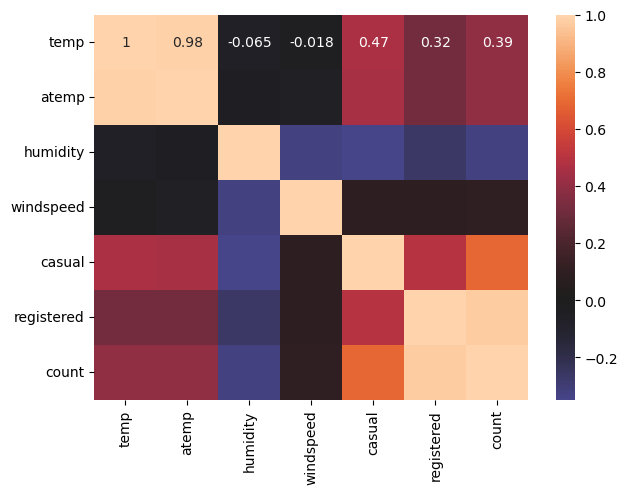

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

There is a very strong correlation (almost linear dependence) between the `temp-atemp` and `registered-count` pairs. To a lesser extent, other pairs in the group including `temp`, `atemp`, `casual`, `registered`, `count` indicators correlate with each other. A significant inverse correlation is observed in `humidity` with `windspeed`, `casual`, `registered`, `count`. `Windspeed` is the most independent metric from the rest.